In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('C:/Users/PC/Desktop/pricing_project/raw4.pickle', 'rb') as raw : 
    raw = pickle.load(raw)

In [4]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(raw, test_size=0.3, random_state=42)



with open('C:/Users/PC/Desktop/pricing_project/train_set.pickle', 'wb') as f:

    pickle.dump(train_set, f)

    

with open('C:/Users/PC/Desktop/pricing_project/test_set.pickle', 'wb') as f:

    pickle.dump(test_set, f)

In [5]:
import tensorflow as tf

#X,y 분리
X_data = train_set.iloc[:,0:-1]
y_data = train_set.iloc[:, -1]

X_test = test_set.iloc[:,0:-1]
y_test = test_set.iloc[:, -1]


#Normalize 
#X_data -= np.mean(X_data, axis=0)
#X_data /= np.std(X_data, axis=0)

#X_test -= np.mean(X_test, axis=0)
#X_test /= np.std(X_test, axis=0)

In [6]:
X = tf.placeholder(tf.float32, [None, 44]) 
Y = tf.placeholder(tf.float32, [None, 1]) 

In [7]:
#keep_prob = tf.placeholder(tf.float32)

W1 = tf.get_variable("W1", shape=[44, 100],initializer=tf.contrib.layers.xavier_initializer()) 

b1 = tf.Variable(tf.random_normal([100]))
L1 = tf.nn.relu(tf.matmul(X, W1) + b1) 

W2 = tf.get_variable("W2", shape=[100, 10],initializer=tf.contrib.layers.xavier_initializer()) 

b2 = tf.Variable(tf.random_normal([10]))
L2 = tf.nn.relu(tf.matmul(L1, W2) + b2)

W3 = tf.get_variable("W3", shape=[10, 1],initializer=tf.contrib.layers.xavier_initializer()) 

b3 = tf.Variable(tf.random_normal([1]))
L3 = tf.sigmoid(tf.matmul(L2, W3) + b3) 


#L1 = tf.nn.dropout(L1, rate=keep_prob) 



For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
cost = tf.reduce_mean(tf.square(L3 - Y)) # RMSE
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost) 

In [9]:
predicted = tf.cast(L1 > 0.5, dtype=tf.float32) 
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32)) 

In [10]:
#def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data.iloc[i] for i in idx]
    labels_shuffle = [labels.iloc[i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [ ]:
# parameters
batch_size = 100
training_epochs = 5
total_batch = int(X_data.shape[0] / batch_size)

# initialize
sess = tf.Session()
sess.run(tf.global_variables_initializer())

#train
for epoch in range(training_epochs):
    avg_cost = 0

    for i in range(total_batch):      
        batch_xs, batch_ys = X_data[batch_size*i:batch_size*(i+1)], y_data[batch_size*i:batch_size*(i+1)]
        batch_ys = batch_ys.values.reshape(-1,1)
        c, _ = sess.run([cost, train], feed_dict={X: batch_xs, Y: batch_ys })#keep_prob: 0.5 
        avg_cost += c / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))
print('Learning Finished!')



Epoch: 0001 cost = 0.664757411


In [13]:
# Accuracy report 
X_test = np.array(X_test)
y_test = np.array(y_test).reshape(-1,1)
a = sess.run([accuracy], feed_dict={X: X_test, Y: y_test}) # keep_prob: 1
print("\nAccuracy: ", a) 


Accuracy:  [0.48740616]


In [8]:

from sklearn.linear_model import LogisticRegression 

model = LogisticRegression()
# fit the model with data 
model.fit(X_data,y_data)
# predict 
y_pred=model.predict(X_test)

from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) 
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred))




C:\Users\PC\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[476334  30392]
 [178981  75872]]
Accuracy: 0.7250803921851837
Precision: 0.7139953323797334
Recall: 0.297708875312435


Text(0.5, 257.44, 'Predicted label')

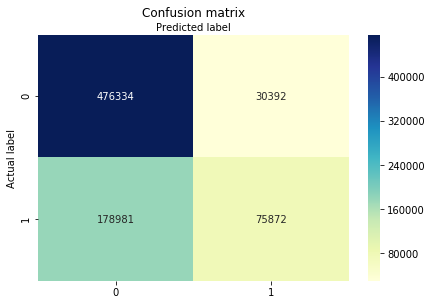

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
class_names=[0,1] # name  of classes 
fig, ax = plt.subplots() 
tick_marks = np.arange(len(class_names)) 
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)
# create heatmap 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 
ax.xaxis.set_label_position("top") 
plt.tight_layout() 
plt.title('Confusion matrix', y=1.1) 
plt.ylabel('Actual label') 
plt.xlabel('Predicted label')

In [10]:
from sklearn import svm
model = svm.LinearSVC() #model = svm.SVC(gamma='scale') 
model.fit(X_data,y_data) 
y_pred=model.predict(X_test)
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred))




C:\Users\PC\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[ 36126 470600]
 [ 11312 243541]]
Accuracy: 0.36721994697858
Precision: 0.3410264919672726
Recall: 0.9556136282484412


In [11]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_data,y_data) 
y_pred=model.predict(X_test)

from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred))


[[373595 133131]
 [125992 128861]]
Accuracy: 0.659755586748059
Precision: 0.4918508962105713
Recall: 0.5056287349962527


In [12]:

from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()
# fit the model with data 
model.fit(X_data,y_data) 
# predict 
y_pred=model.predict(X_test)
from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred))


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[[448381  58345]
 [146595 108258]]
Accuracy: 0.7309011934415208
Precision: 0.649796222156864
Recall: 0.42478605313651396


In [13]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(3) # default 5
model.fit(X_data,y_data)
y_pred=model.predict(X_test)

from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred))

[[394255 112471]
 [155201  99652]]
Accuracy: 0.6485302247042001
Precision: 0.46978404039165955
Recall: 0.39101756698959794


In [16]:
import xgboost 
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_data, y_data)
y_pred=model.predict(X_test)

from sklearn import metrics 
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred)) 
print("Recall:",metrics.recall_score(y_test, y_pred))


[[456512  50214]
 [141302 113551]]
Accuracy: 0.74852772988751
Precision: 0.6933777058590053
Recall: 0.4455548885043535


In [24]:
# parameter tuning

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate, StratifiedKFold

seed = 342
np.random.seed(seed)



In [35]:
params_grid= {
    'max_depth' : [1,2,3],
    'n_estimators' : [5,10,15,20],
    'learning_rate' : np.linspace(1e-16, 1,3)
    
}

params_fixed = {
    'objective' : 'binary : logistic',
    'silient': 1
}



In [39]:
cv = StratifiedKFold(n_splits = 3,random_state = seed)

bst_grid = GridSearchCV ( 
    estimator = XGBClassifier(**params_fixed,seed=seed),
    param_grid = params_grid,
    cv = cv,
    scoring= 'accuracy'   
    
)




In [41]:
bst_grid.fit(X_data,y_data)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


XGBoostError: [22:18:15] C:\Jenkins\workspace\xgboost-win64_release_0.90\src\objective\objective.cc:23: Unknown objective function binary : logistic

In [ ]:
bst_grid.grid_scores_